# Linear regression example

Borrowed heavily from: http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb

## Glass identification dataset

This dataset (from UCI) contains multiple chemical compositions which make up various types of glass (labelled types 1-7). It also contains the refractive index `ri`.    

    Attribute Information:

    1. Id number: 1 to 214
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
    -- 1 building_windows_float_processed
    -- 2 building_windows_non_float_processed
    -- 3 vehicle_windows_float_processed
    -- 4 vehicle_windows_non_float_processed (none in this database)
    -- 5 containers
    -- 6 tableware
    -- 7 headlamps
    
Lets load the dataset into pandas. 

In [2]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

In [4]:
glass

ri     na    mg    al     si     k    ca    ba    fe  glass_type
id                                                                        
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00           1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00           1
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00           1
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00           1
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00           1
6    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26           1
7    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00           1
8    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00           1
9    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00           1
10   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11           1
11   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24           1
12   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00           1
13   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24           1
14   1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.00  0.17           1
15   1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.00  0.00           1
16   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00           1
17   1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.00  0.00           1
18   1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00           1
19   1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.00  0.00           1
20   1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.00  0.07           1
21   1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.00  0.19           1
22   1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.00  0.00           1
23   1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.00  0.00           1
24   1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.00  0.00           1
25   1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.00  0.00           1
26   1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.00  0.00           1
27   1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.00  0.00           1
28   1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.00  0.00           1
29   1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.00  0.00           1
30   1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00           1
..       ...    ...   ...   ...    ...   ...   ...   ...   ...         ...
185  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00           6
186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00           7
187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00           7
188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00           7
189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00           7
190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00           7
191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00           7
192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09           7
193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09           7
194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08           7
195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07           7
196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05           7
197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01           7
198  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00           7
199  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00           7
200  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00           7
201  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00           7
202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00           7
203  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00           7
204  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00           7
205  1.51617  14.95  0.00  2.27  73

What if we wanted to predict ri? 

* What type of a variable is ri?
* What type of machine learning is used to predict such a variables?

For illustration purposes, lets assume we only have one independent variable we want to use to predict `ri`, in this case `al`.  We can visualize this using ... what type of plot?

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/john/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


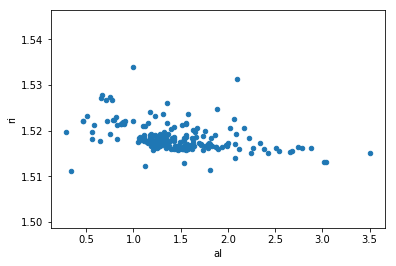

In [6]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

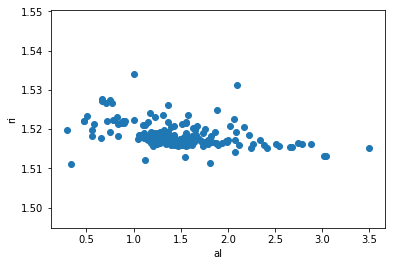

In [8]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')
plt.show()

Lets learn a linear regression model to predict the `ri` using just `al` using scikit-learn.

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
linreg.predict(X)

array([1.51921996, 1.51857579, 1.51812982, 1.51874922, 1.5188731 ,
       1.51793161, 1.51912086, 1.51934384, 1.51855101, 1.51857579,
       1.51808026, 1.51879877, 1.51847668, 1.51879877, 1.51869967,
       1.51889787, 1.51907131, 1.51974026, 1.51902175, 1.51775818,
       1.5182537 , 1.52122682, 1.51874922, 1.51860056, 1.51909608,
       1.51894743, 1.51845191, 1.51865011, 1.51840235, 1.51877399,
       1.51872444, 1.51912086, 1.51889787, 1.51852623, 1.51862534,
       1.51894743, 1.51867489, 1.51860056, 1.52078086, 1.52078086,
       1.51917041, 1.5189722 , 1.51865011, 1.52016145, 1.51899698,
       1.51860056, 1.51902175, 1.52018623, 1.51998802, 1.51889787,
       1.52068175, 1.51877399, 1.51899698, 1.51877399, 1.51874922,
       1.51874922, 1.51917041, 1.51874922, 1.51904653, 1.51899698,
       1.51919519, 1.51867489, 1.51976504, 1.5200128 , 1.51971548,
       1.51917041, 1.51978981, 1.51978981, 1.51971548, 1.51991369,
       1.5176343 , 1.51879877, 1.51817937, 1.51805549, 1.51812

In [11]:
glass['ri_pred'] = linreg.predict(X)

In [12]:
glass

ri     na    mg    al     si     k    ca    ba    fe  glass_type  \
id                                                                           
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00           1   
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00           1   
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00           1   
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00           1   
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00           1   
6    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26           1   
7    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00           1   
8    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00           1   
9    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00           1   
10   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11           1   
11   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24           1   
12   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00           1   
13   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24           1   
14   1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.00  0.17           1   
15   1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.00  0.00           1   
16   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00           1   
17   1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.00  0.00           1   
18   1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00           1   
19   1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.00  0.00           1   
20   1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.00  0.07           1   
21   1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.00  0.19           1   
22   1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.00  0.00           1   
23   1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.00  0.00           1   
24   1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.00  0.00           1   
25   1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.00  0.00           1   
26   1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.00  0.00           1   
27   1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.00  0.00           1   
28   1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.00  0.00           1   
29   1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.00  0.00           1   
30   1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00           1   
..       ...    ...   ...   ...    ...   ...   ...   ...   ...         ...   
185  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00           6   
186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00           7   
187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00           7   
188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00           7   
189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00           7   
190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00           7   
191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00           7   
192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09           7   
193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09           7   
194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08           7   
195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07           7   
196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05           7   
197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01           7   
198  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00           7   
199  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00           7   
200  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00           7   
201  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00           7   
202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00           7   
203  1.51514  14.85  0.00  2.42 

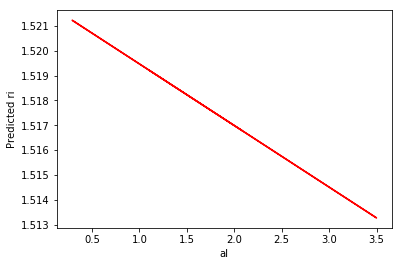

In [14]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')
plt.show()

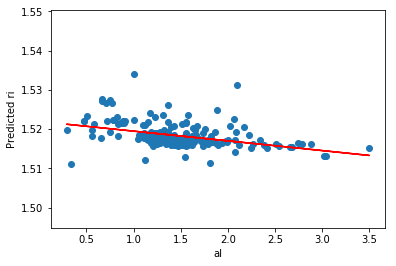

In [16]:
# Putting it all together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')
plt.show()

## Looking inside the learned model

The equation learned is $$y = Ax + B$$. 
Where A is viewable is `linreg.coef_` and B is vierablw as `linreg.intercept_`.

In [17]:
linreg.coef_

array([-0.00247761])

In [18]:
linreg.intercept_

1.5219453302386425

In [19]:
# predice the value is al is 2.0:
(linreg.coef_ * 2) + linreg.intercept_

array([1.51699012])

## Exercise: Find another variable to predict ri

Pick one of the other variables and so a linear regression to see if it works as well.

In [35]:
# do exercise here. 